In [50]:
#tried to install packages to read shp. file just in case, but takes too long time so be careful
install.packages("rgdal")
install.packages("sf")

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘s2’, ‘units’


Warning message in install.packages("sf"):
“installation of package ‘s2’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘sf’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [52]:
#load packages
library(tidyverse)
library(dplyr)
library(readr)
library(lubridate)
library(ggplot2)
library(patchwork)
library(repr)
#library(rgdal)
#library(sf)

In [53]:
#load EMSA data
EMSA <- read_csv("emsa_dat.csv")

Rows: 173291 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): enter_time, exit_time, time_availability, geofence_id, geofence_na...
dbl  (4): Event_UID, Vessel_UID, length_m, width_m
lgl  (3): bcferry, height_m, weight
date (2): enter_date, exit_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [54]:
head(EMSA)

Event_UID,Vessel_UID,enter_date,enter_time,exit_date,exit_time,time_availability,geofence_id,geofence_name,bcferry,length_m,width_m,height_m,weight,entity_type,registered_type
<dbl>,<dbl>,<date>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
1,1,2020-01-05,2020-01-05 12:08:26,NA,NA,entry no exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA
2,1,2020-01-05,2020-01-05 13:46:26,2020-01-05,2020-01-05 14:23:07,has entry and exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA
3,1,2020-01-06,2020-01-06 13:17:34,2020-01-06,2020-01-06 13:19:34,has entry and exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA
4,1,2020-01-06,2020-01-06 15:57:10,NA,NA,entry no exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA
5,1,2020-01-06,2020-01-06 15:57:17,NA,NA,entry no exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA
6,1,2020-01-06,2020-01-06 15:58:46,2020-01-07,2020-01-06 16:02:09,has entry and exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA


In [55]:
#convert enter_time and exit_time to date-time objects (in case needed)
EMSA$enter_time <- ymd_hms(EMSA$enter_time)
EMSA$exit_time <- ymd_hms(EMSA$exit_time)

Warning message:
“ 1 failed to parse.”


In [84]:
#filter entry & exits in February and March, name the filtered data EMSA_NoV
EMSA_NoV <- EMSA %>%
mutate(enter_month = month(enter_date)) %>%
mutate(exit_month = month(exit_date)) %>%
mutate(enter_year = year(enter_date)) %>%
mutate(exit_year = year(exit_date))%>%
filter(enter_month %in% c(2, 3)|exit_month %in% c(2,3))
head(EMSA_NoV)

Event_UID,Vessel_UID,enter_date,enter_time,exit_date,exit_time,time_availability,geofence_id,geofence_name,bcferry,length_m,width_m,height_m,weight,entity_type,registered_type,enter_month,exit_month,enter_year,exit_year
<dbl>,<dbl>,<date>,<dttm>,<date>,<dttm>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7,1,2020-03-08,2020-03-08 13:43:24,NA,NA,entry no exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA,3,NA,2020,NA
8,1,2020-03-08,2020-03-08 14:15:11,NA,NA,entry no exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,NA,NA,3,NA,2020,NA
173233,5,2022-03-19,2022-03-19 10:25:00,NA,NA,entry no exit,13-13,Open Bay,FALSE,NA,NA,NA,NA,NA,NA,3,NA,2022,NA
173234,5,2022-03-19,2022-03-19 10:27:00,NA,NA,last entry,13-13,Open Bay,FALSE,NA,NA,NA,NA,NA,NA,3,NA,2022,NA
60,6,2023-02-24,2023-02-24 04:21:44,NA,NA,last entry,14-14,Comox,FALSE,NA,NA,NA,NA,UNKNOWN,NA,2,NA,2023,NA
11,8,2023-03-31,2023-03-31 16:05:53,2023-03-31,2023-03-31 16:11:12,has entry and exit,13-15,Marina & West Cortes Island,FALSE,NA,NA,NA,NA,UNKNOWN,NA,3,3,2023,2023


In [85]:
#Just checking geofence names
EMSA_NoV%>%
group_by(geofence_name)%>%
summarise()

geofence_name
<chr>
Central West Denman Island
Comox
Comox Bar
Deep Bay
Denman Point
Fanny Bay
Marina & West Cortes Island
Metcalf Bay
Mud Bay


In [121]:
#Number of entries (count of Vessel UID) in February and March in each year at each geofence
Entry <- EMSA_NoV %>%
filter(enter_month %in% c(2,3))%>%
group_by(enter_year, geofence_name, Vessel_UID) %>%
summarize() %>%
group_by(enter_year, geofence_name) %>%
summarise(count = n_distinct(Vessel_UID))
head(Entry)

#Number of entries (count of Vessel UID) in February and March in each year at each geofence
Exit <- EMSA_NoV %>%
filter(exit_month %in% c(2,3))%>%
group_by(exit_year, geofence_name, Vessel_UID) %>%
summarize() %>%
group_by(exit_year, geofence_name) %>%
summarise(count = n_distinct(Vessel_UID))
head(Exit)

`summarise()` has grouped output by 'enter_year', 'geofence_name'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'enter_year'. You can override using the
`.groups` argument.


enter_year,geofence_name,count
<dbl>,<chr>,<int>
2020,Central West Denman Island,47
2020,Comox,50
2020,Comox Bar,66
2020,Deep Bay,35
2020,Denman Point,36
2020,Fanny Bay,38


`summarise()` has grouped output by 'exit_year', 'geofence_name'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'exit_year'. You can override using the
`.groups` argument.


exit_year,geofence_name,count
<dbl>,<chr>,<int>
2020,Central West Denman Island,48
2020,Comox,47
2020,Comox Bar,66
2020,Deep Bay,35
2020,Denman Point,36
2020,Fanny Bay,38


Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_bar()`).”


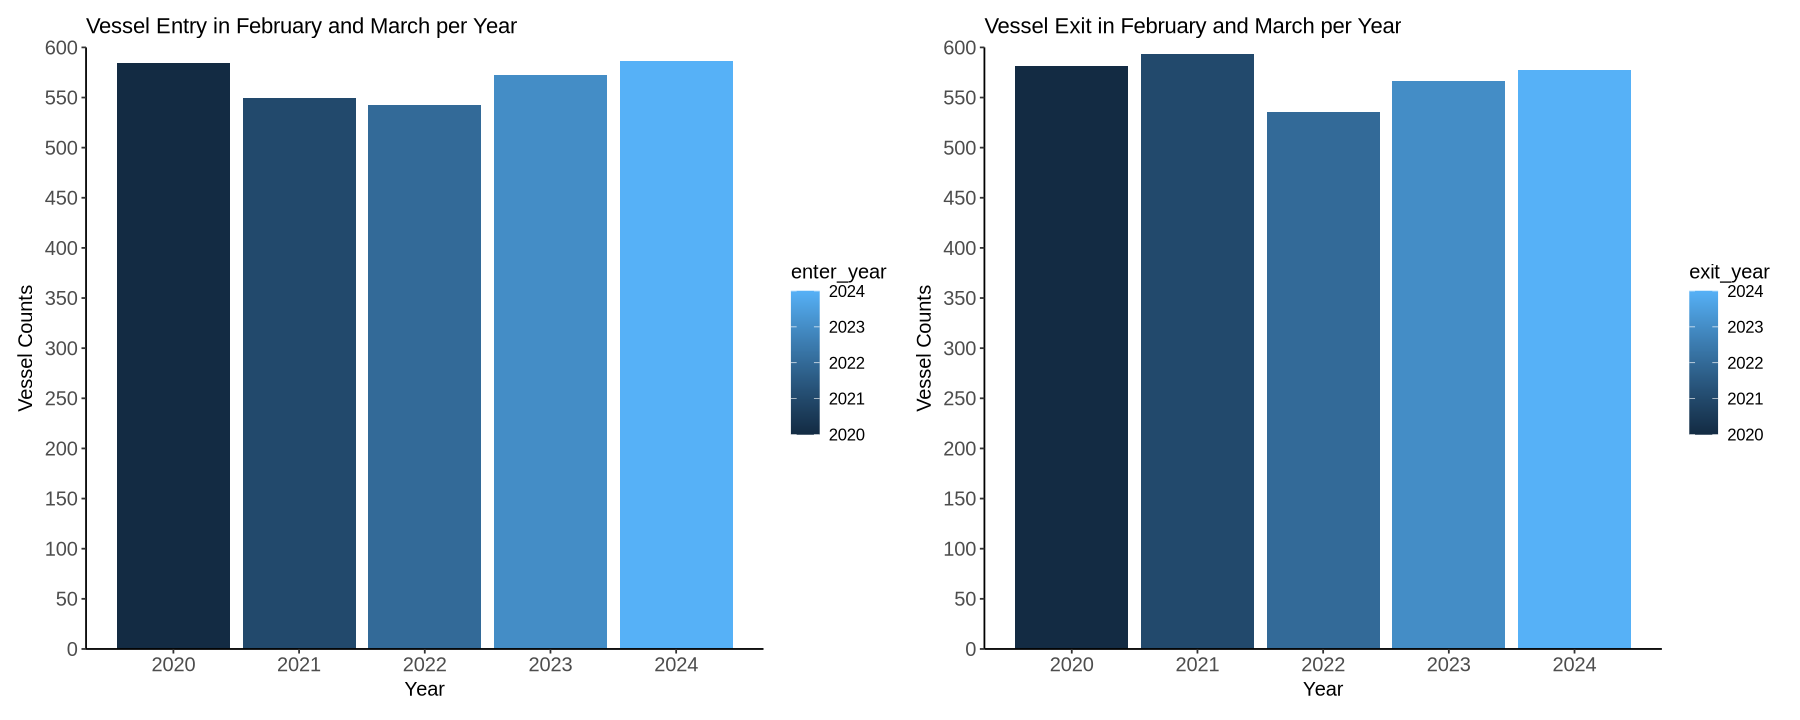

In [126]:
#Visualize the table above (count vs year)
Entry_year <- Entry %>%
ggplot(aes(x = enter_year, y = count, fill = enter_year)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 600), breaks = seq(0, 600, by = 50),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Year", y = "Vessel Counts", title = "Vessel Entry in February and March per Year") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
       legend.text = element_text(size = 10),
       legend.title = element_text(size = 12),
       )  

Exit_year <- Exit %>%
ggplot(aes(x = exit_year, y = count, fill = exit_year)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 600), breaks = seq(0, 600, by = 50),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Year", y = "Vessel Counts", title = "Vessel Exit in February and March per Year") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
       legend.text = element_text(size = 10),
       legend.title = element_text(size = 12),
       )                       
Entry_year+Exit_year
options(repr.plot.width = 18, repr.plot.height = 6)

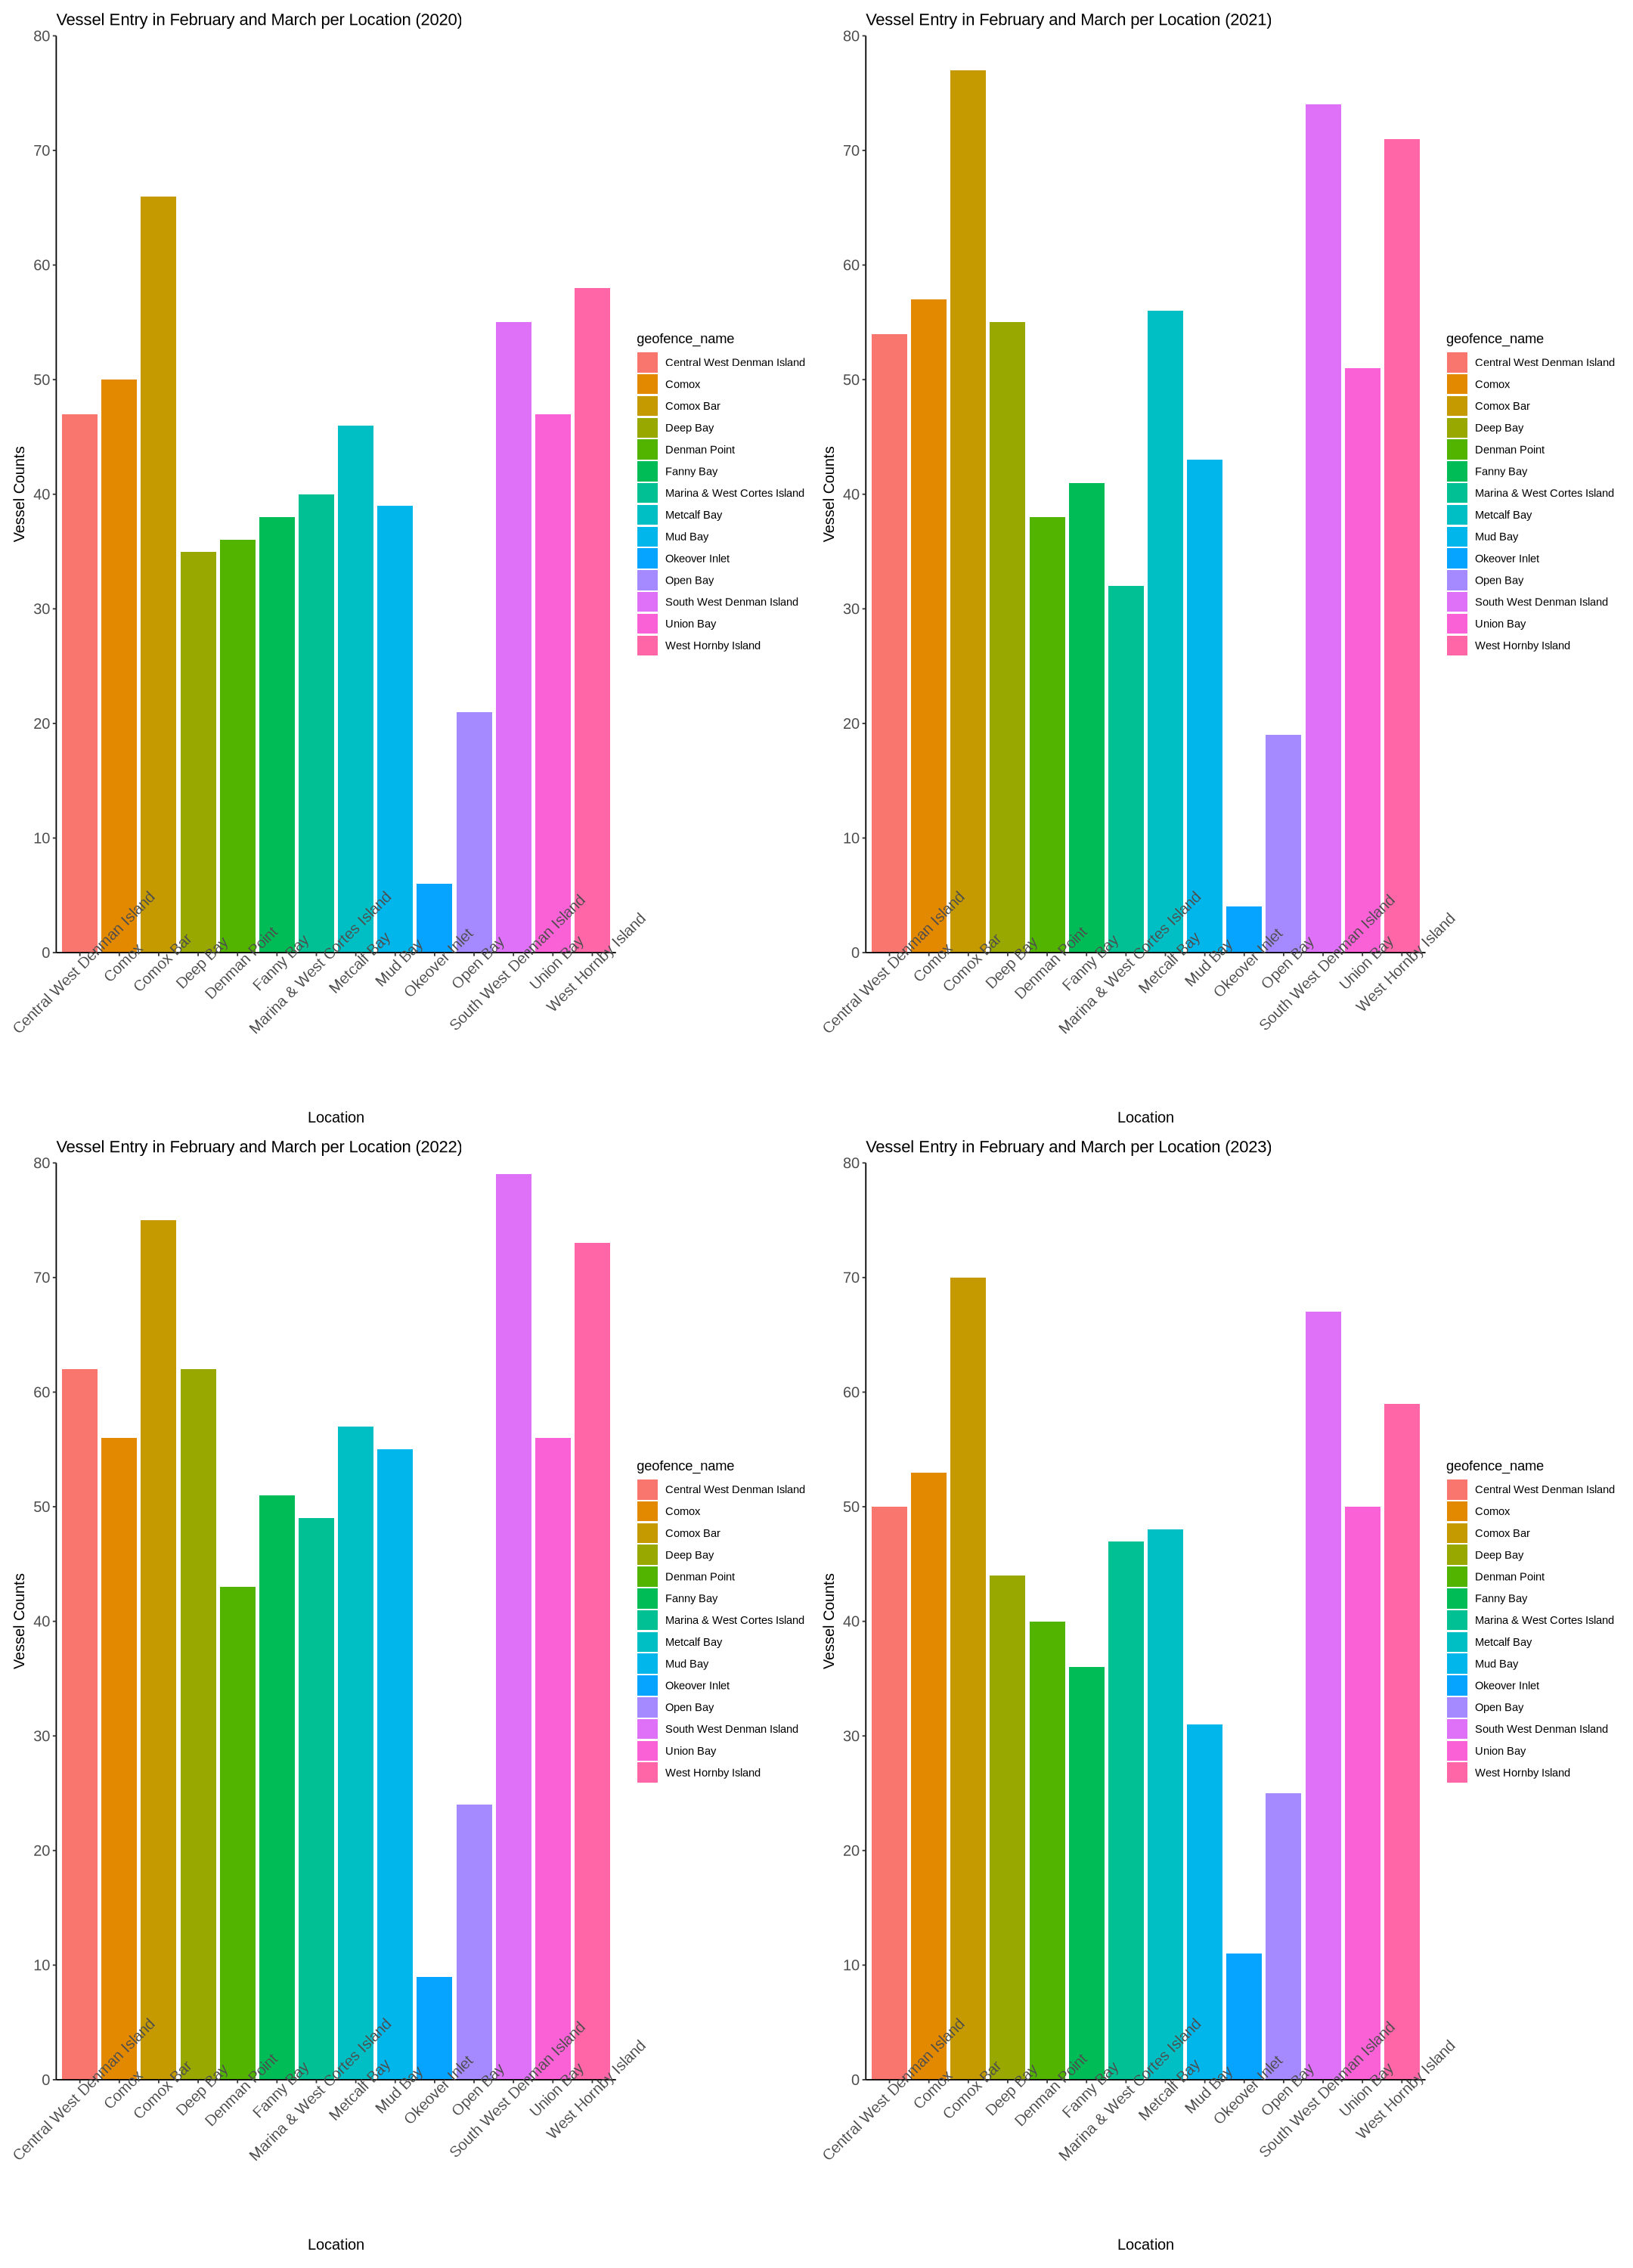

In [137]:
#Visualize the table above (count of entries vs geofence)
Entry_fence20 <- Entry %>%
filter(enter_year == 2020)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Entry in February and March per Location (2020)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

Entry_fence21 <- Entry %>%
filter(enter_year == 2021)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Entry in February and March per Location (2021)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

Entry_fence22 <- Entry %>%
filter(enter_year == 2022)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Entry in February and March per Location (2022)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

Entry_fence23 <- Entry %>%
filter(enter_year == 2023)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Entry in February and March per Location (2023)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

(Entry_fence20+Entry_fence21)/(Entry_fence22+Entry_fence23)   
 options(repr.plot.width = 18, repr.plot.height = 20)                    

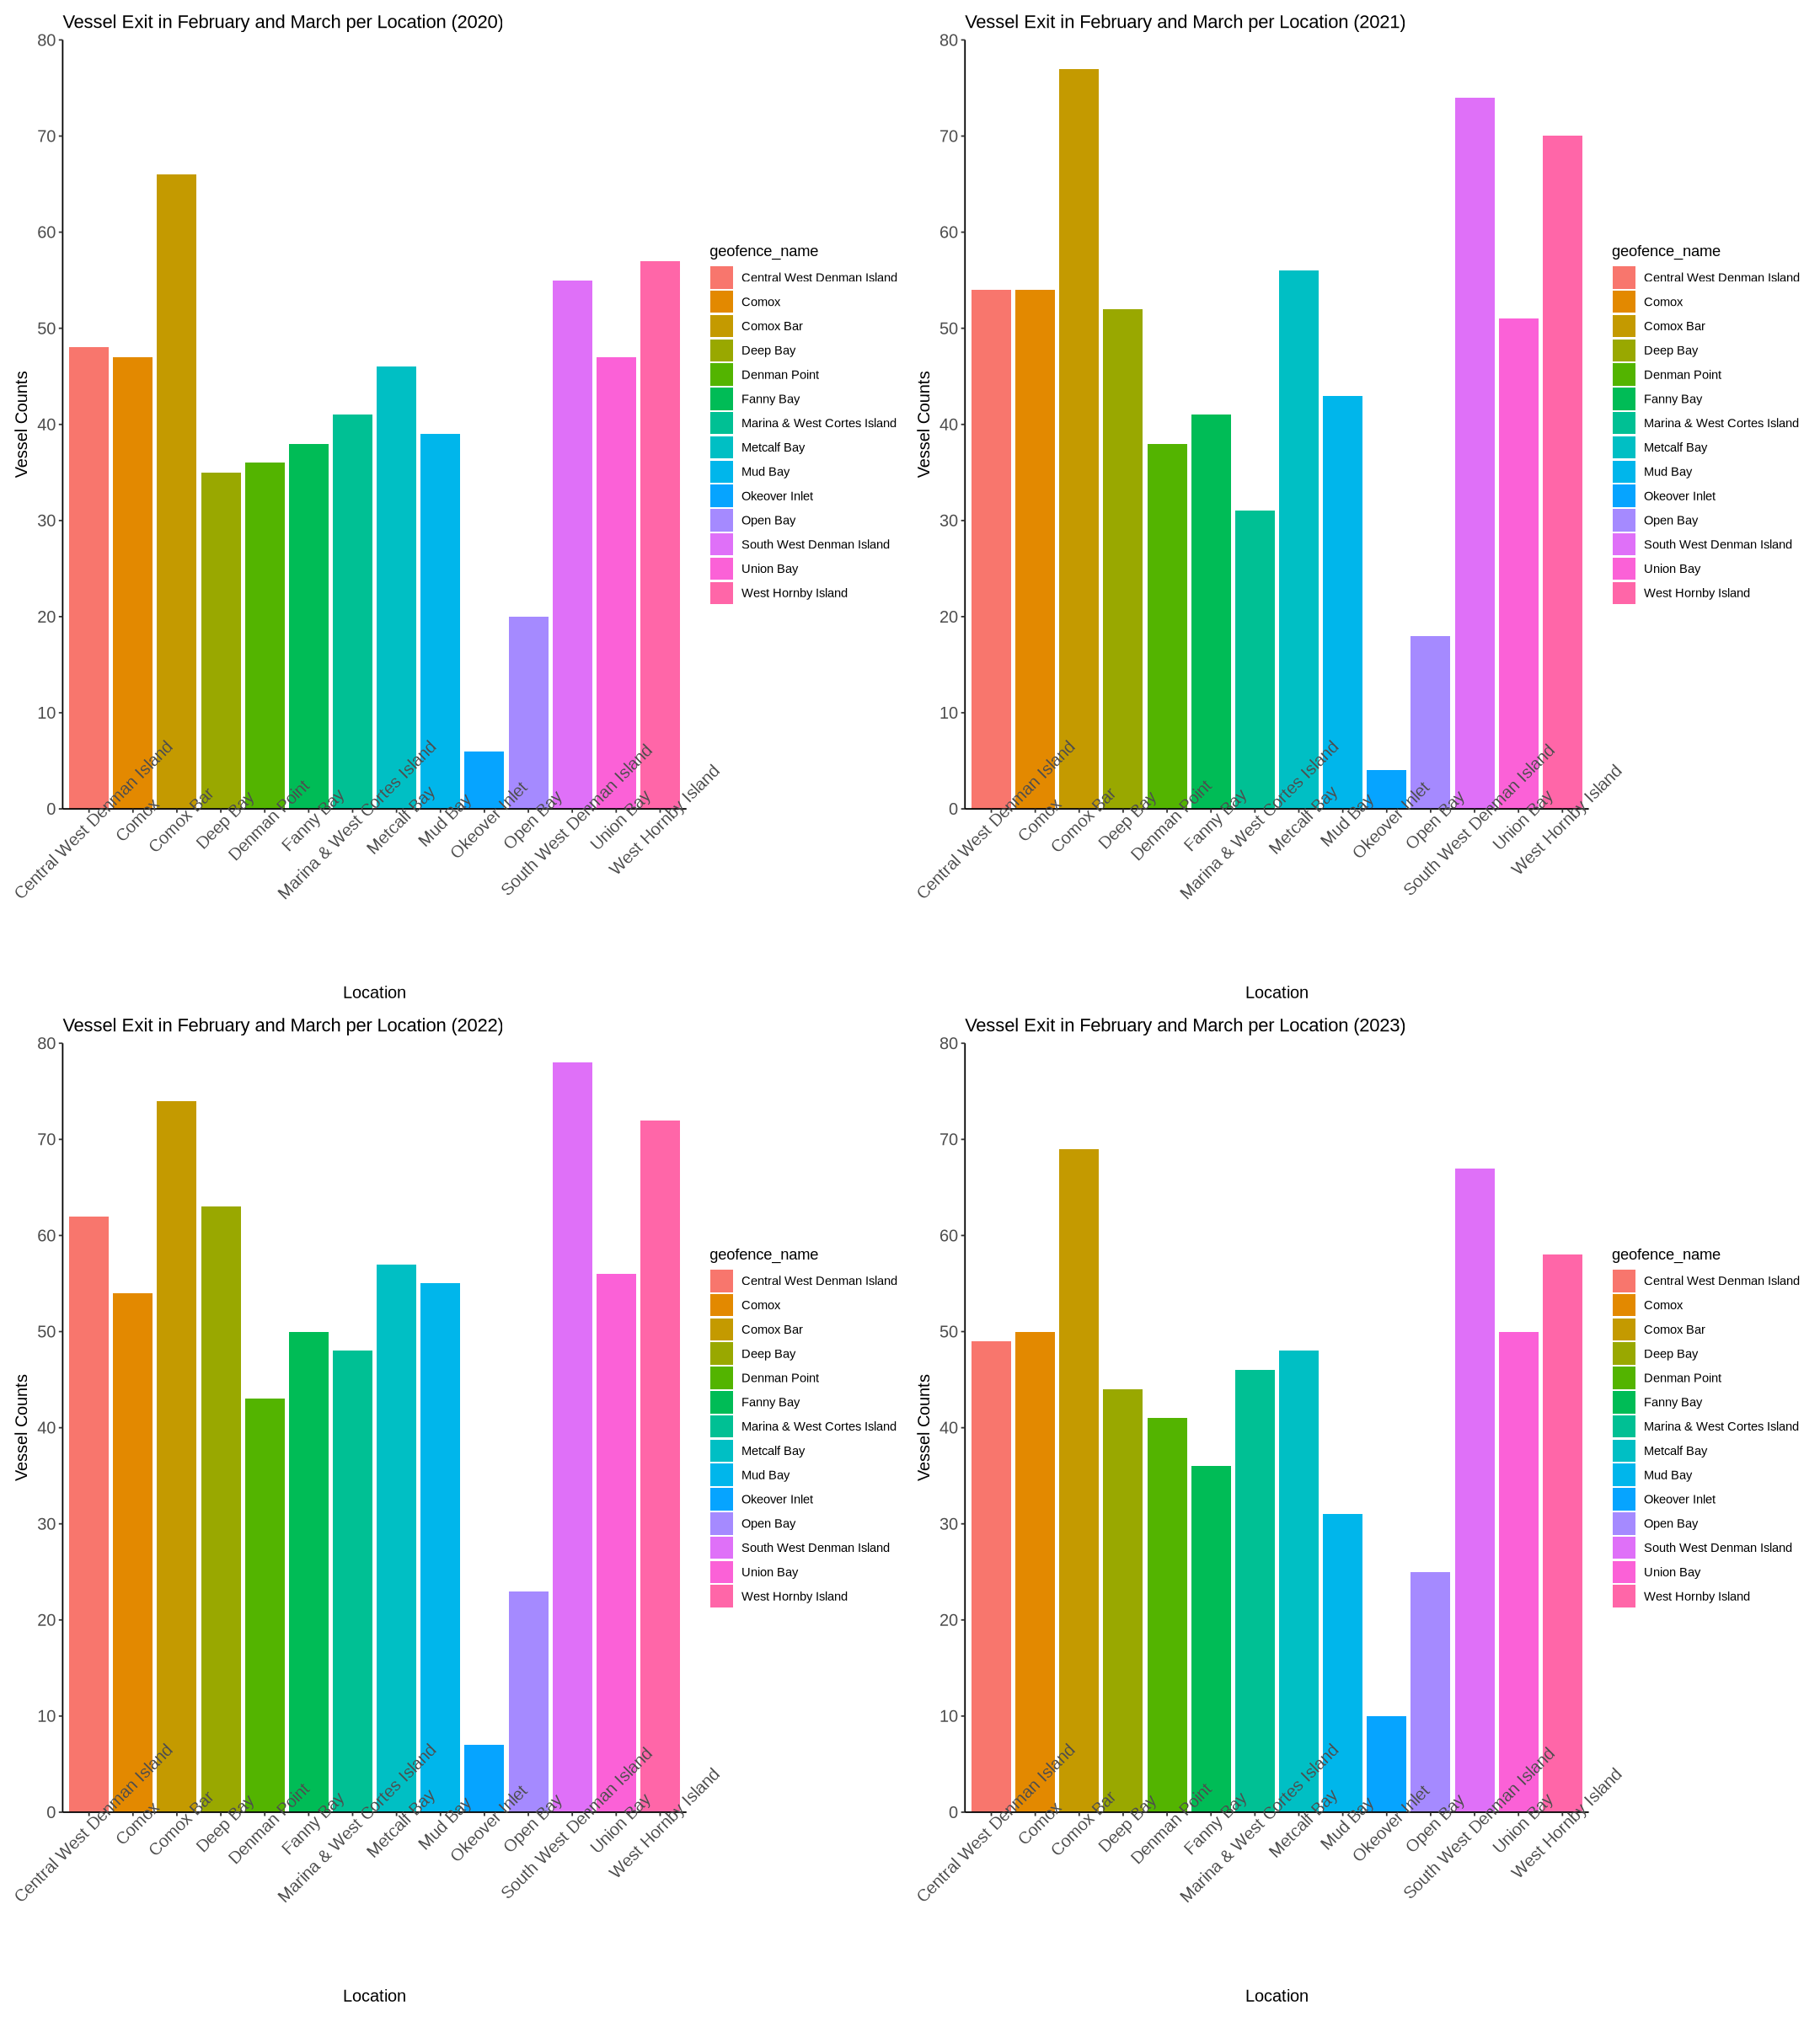

In [138]:
#Visualize the table above (count of exits vs geofence)
Exit_fence20 <- Exit %>%
filter(exit_year == 2020)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Exit in February and March per Location (2020)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

Exit_fence21 <- Exit %>%
filter(exit_year == 2021)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Exit in February and March per Location (2021)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

Exit_fence22 <- Exit %>%
filter(exit_year == 2022)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Exit in February and March per Location (2022)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

Exit_fence23 <- Exit %>%
filter(exit_year == 2023)%>%
ggplot(aes(x = geofence_name, y = count, fill = geofence_name)) +
geom_bar(stat = "identity") +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 80), breaks = seq(0, 80, by = 10),
                    labels = function(y) ifelse(y %% 1 == 0, as.character(y), ""))+
  labs(x = "Location", y = "Vessel Counts", title = "Vessel Exit in February and March per Location (2023)") + #Edit lables
  theme_bw()+ #making the theme black and white
  theme(strip.text = element_blank(), #removing plot label
       panel.grid.major = element_blank(), #removing major grids
       panel.grid.minor = element_blank(), #removing minor grids
       panel.border = element_blank(),#removing the border 
       axis.line = element_line(color = "black"), #keeping axis
       axis.text.x = element_text(size = 12, angle = 45), #Adjusting text sizes
       axis.text.y = element_text(size = 12), 
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
#       legend.text = element_text(size = 10),
#       legend.title = element_text(size = 12),
       )  

(Exit_fence20+Exit_fence21)/(Exit_fence22+Exit_fence23)   
 options(repr.plot.width = 18, repr.plot.height = 20)   